## Importação de Bibliotecas

In [150]:
# Bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Balanceamento
from imblearn.over_sampling import SMOTE, ADASYN

# Redução
from sklearn.decomposition import PCA

# Normalização
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Cluster (agrupamento)
from scipy.spatial.distance import cdist 
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# Classificação
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_predict

    # Árvore de decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

    # KNN
from sklearn.neighbors import KNeighborsClassifier

    # SVM
from sklearn.svm import SVC

    # Rede neural (MLP)
from sklearn.neural_network import MLPClassifier

# Seleção e pré-processamento de dados:

* **Base de dados**: ["Loan Data Set"](https://www.kaggle.com/datasets/mirzahasnine/loan-data-set?resource=download);
* **Problema a ser investigado**: Aprovação ou não aprovação de empréstimo para pessoas de acordo com seus dados;
* **Número de amostras**: 614;
* **Número de atributos**: 12;
* **Tipos de atributos**: Categóricos e numéricos;
* **Valores ausentes**: Sim.

### Limpeza de dados

* Leitura da base de dados

In [151]:
def ShowInformationDataFrame(df, message=""):
    print(message+"\n")
    # Imprime as 10 primeiras linhas do arquivo
    print("PRIMEIRAS 10 LINHAS\n")
    print(df.head(10))
    print("\n")
    # Imprime informações sobre os dados
    print("INFORMAÇÕES GERAIS DOS DADOS\n")
    print(df.info())
    print("\n")
    # Imprime uma analise descritiva sobre os dados
    print("DESCRIÇÃO DOS DADOS\n")
    print(df.describe())
    print("\n")
    # Imprime a quantidade de valores faltantes por coluna
    print("VALORES FALTANTES\n")
    print(df.isnull().sum())
    print("\n") 

In [152]:
input_file = './0-Datasets/loan_train.csv'
names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term','Credit_History', 'Area', 'Status']
columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term','Credit_History', 'Area', 'Status']
features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term','Credit_History', 'Area']
target = 'Status'
df = pd.read_csv(input_file,        # Nome do arquivo com dados
                names = names,      # Nome das colunas 
                usecols = columns, # Define as colunas que serão  utilizadas
                na_values='')       # Define que ? será considerado valores ausentes

ShowInformationDataFrame(df, "DataFrame")

DataFrame

PRIMEIRAS 10 LINHAS

  Gender Married Dependents     Education Self_Employed  Applicant_Income  \
0   Male      No          0  Not Graduate            No            604500   
1   Male      No          0      Graduate            No            584900   
2   Male     Yes          1      Graduate            No            458300   
3   Male     Yes          0      Graduate           Yes            300000   
4   Male     Yes          0  Not Graduate            No            258300   
5   Male      No          0      Graduate            No            600000   
6   Male     Yes          2      Graduate           Yes            541700   
7   Male     Yes          0  Not Graduate            No            233300   
8   Male     Yes         3+      Graduate            No            303600   
9   Male     Yes          2      Graduate            No            400600   

   Coapplicant_Income  Loan_Amount   Term  Credit_History       Area Status  
0                 0.0     11500000  360.0 

* Tratamento dos valores faltantes
  * método de DELETAR os objetos que possuem valores faltantes

In [153]:
def UpdateMissingValues(df, column, method="mode", number=0):
    if method == 'number':
        # Substituindo valores ausentes por um número
        df[column].fillna(number, inplace=True)
    elif method == 'median':
        # Substituindo valores ausentes pela mediana 
        median = df[column].median()
        df[column].fillna(median, inplace=True)
    elif method == 'mean':
        # Substituindo valores ausentes pela média
        mean = df[column].mean()
        df[column].fillna(mean, inplace=True)
    elif method == 'mode':
        # Substituindo valores ausentes pela moda
        mode = df[column].mode()[0]
        df[column].fillna(mode, inplace=True)
    elif method == 'delete':
        df.dropna(axis=0, how='any', subset=column, inplace=True)

columns_missing_value = df.columns[df.isnull().any()]
print(columns_missing_value)
method = 'delete' # number or median or mean or mode
    
for c in columns_missing_value:
    UpdateMissingValues(df, c, method)
    
ShowInformationDataFrame(df,"Dataframe UpdateMissingValues")

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'Term',
       'Credit_History'],
      dtype='object')
Dataframe UpdateMissingValues

PRIMEIRAS 10 LINHAS

  Gender Married Dependents     Education Self_Employed  Applicant_Income  \
0   Male      No          0  Not Graduate            No            604500   
1   Male      No          0      Graduate            No            584900   
2   Male     Yes          1      Graduate            No            458300   
3   Male     Yes          0      Graduate           Yes            300000   
4   Male     Yes          0  Not Graduate            No            258300   
5   Male      No          0      Graduate            No            600000   
6   Male     Yes          2      Graduate           Yes            541700   
7   Male     Yes          0  Not Graduate            No            233300   
8   Male     Yes         3+      Graduate            No            303600   
9   Male     Yes          2      Graduate            No        

* Conversão dos atributos categóricos para numéricos

In [154]:
# Converte os atributos categóricos para numéricos
    # get all categorical columns
cat_columns = df.select_dtypes(['object']).columns

    # convert all categorical columns to numeric
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

ShowInformationDataFrame(df,"Dataframe numérico")

Dataframe numérico

PRIMEIRAS 10 LINHAS

   Gender  Married  Dependents  Education  Self_Employed  Applicant_Income  \
0       0        0           0          0              0            604500   
1       0        0           0          1              0            584900   
2       0        1           1          1              0            458300   
3       0        1           0          1              1            300000   
4       0        1           0          0              0            258300   
5       0        0           0          1              0            600000   
6       0        1           2          1              1            541700   
7       0        1           0          0              0            233300   
8       0        1           3          1              0            303600   
9       0        1           2          1              0            400600   

   Coapplicant_Income  Loan_Amount   Term  Credit_History  Area  Status  
0                 0.0     

### Balanceamento de dados

A base se apresentou desbalanceada, dessa forma, foi necessário utilizar uma técnica de balanceamento.

* Técnicas de Oversample:
  * SMOTE (utilizada)
  * ADASYN

Base default
 1    341
0    158
Name: Status, dtype: int64
Base balanceada
 0    341
1    341
Name: Status, dtype: int64


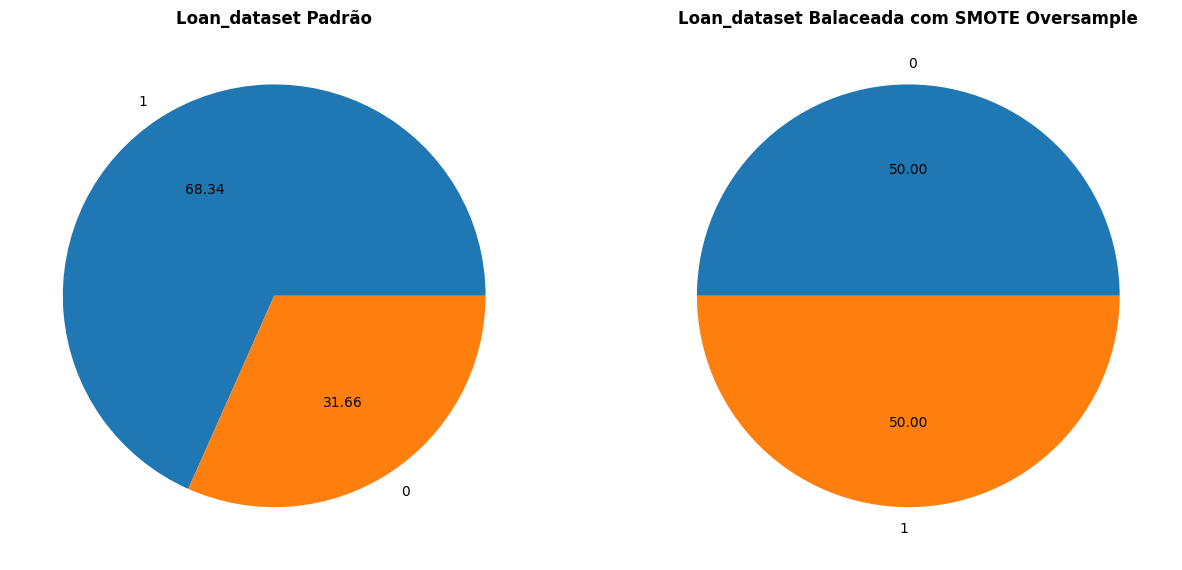

In [155]:
x = df.drop(['Status'], axis=1)
y = df['Status']

# Synthetic Minority Oversampling Technique (SMOTE)
x_os, y_os = SMOTE().fit_resample(x, y)
# Adaptive Synthetic (ADASYN) sampling method
# x_os, y_os = ADASYN().fit_resample(x, y)

print('Base default\n',y.value_counts())
print('Base balanceada\n',y_os.value_counts())

fig, ax = plt.subplots(1, 2, figsize=(15, 10))

y.value_counts().plot.pie(ax=ax[0], autopct='%.2f')
y_os.value_counts().plot.pie(ax=ax[1], autopct='%.2f')

plt.subplots_adjust(hspace = 1)

for n in np.arange(0,2):
    ax[n].set_ylabel('')
    
ax[0].set_title('Loan_dataset Padrão', fontweight='bold')
ax[1].set_title('Loan_dataset Balaceada com SMOTE Oversample', fontweight='bold')

plt.show()

---
# Normalização e redução de dados

### Normalização de dados
* Max-Min
* Z-Score

In [156]:
# Z-score normalization
x_zscore = StandardScaler().fit_transform(x_os)
normalized_zscore_Df = pd.DataFrame(data = x_zscore, columns = features)
normalized_zscore_Df = pd.concat([normalized_zscore_Df, y_os], axis = 1)
ShowInformationDataFrame(normalized_zscore_Df,"Dataframe Z-Score Normalized")

# Mix-Max normalization
x_minmax = MinMaxScaler().fit_transform(x_os)
normalized_minmax_Df = pd.DataFrame(data = x_minmax, columns = features)
normalized_minmax_Df = pd.concat([normalized_minmax_Df, y_os], axis = 1)
ShowInformationDataFrame(normalized_minmax_Df,"Dataframe Min-Max Normalized")

Dataframe Z-Score Normalized

PRIMEIRAS 10 LINHAS

     Gender   Married  Dependents  Education  Self_Employed  Applicant_Income  \
0 -0.394883 -1.141952   -0.729330  -1.669997      -0.346221          0.047823   
1 -0.394883 -1.141952   -0.729330   0.598804      -0.346221          0.019489   
2 -0.394883  0.875694    0.304772   0.598804      -0.346221         -0.163527   
3 -0.394883  0.875694   -0.729330   0.598804       2.888333         -0.392369   
4 -0.394883  0.875694   -0.729330  -1.669997      -0.346221         -0.452652   
5 -0.394883 -1.141952   -0.729330   0.598804      -0.346221          0.041318   
6 -0.394883  0.875694    1.338873   0.598804       2.888333         -0.042962   
7 -0.394883  0.875694   -0.729330  -1.669997      -0.346221         -0.488792   
8 -0.394883  0.875694    2.372975   0.598804      -0.346221         -0.387165   
9 -0.394883  0.875694    1.338873   0.598804      -0.346221         -0.246939   

   Coapplicant_Income  Loan_Amount      Term  Credit_Hist

### Redução de dados (PCA)

Explained variance per component:
[0.2560374173171372, 0.18740655378565702, 0.14243270764446989, 0.12514857533927667, 0.08885717361207379, 0.0804022939867975, 0.07255376305200109, 0.02105038969339958, 0.016507723516723888, 0.006078420432721783, 0.003524981619741734]



Dataframe PCA

PRIMEIRAS 10 LINHAS

   principal component 1  principal component 2  Status
0               0.951401               0.854167       0
1               0.420926              -0.384425       1
2              -0.482455               0.099309       0
3              -0.492890              -0.205267       1
4              -0.186160               0.588019       1
5               0.421879              -0.383984       1
6              -0.708949              -0.112870       1
7              -0.182969               0.589303       1
8              -0.573565               0.070990       0
9              -0.638285              -0.058036       1


INFORMAÇÕES GERAIS DOS DADOS

<class 'pandas.core.frame.DataFrame'>
RangeInd

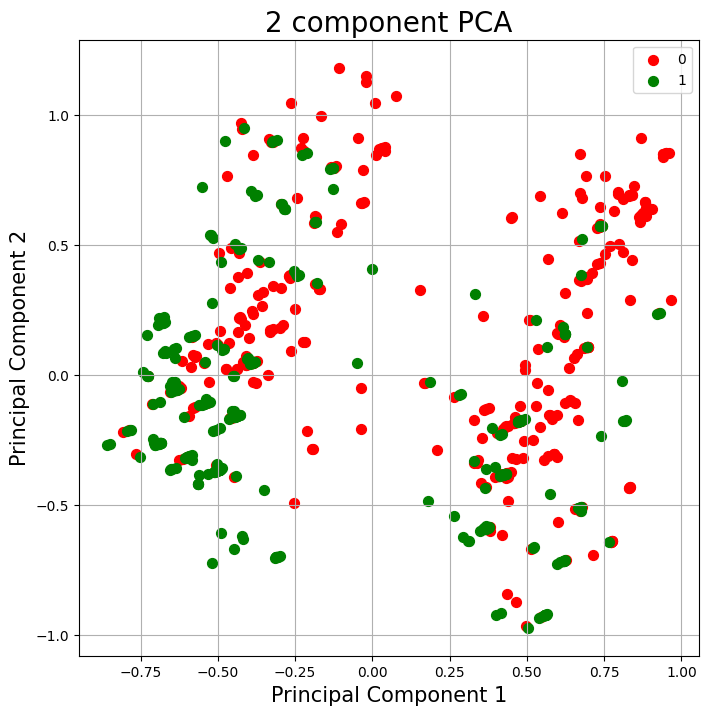

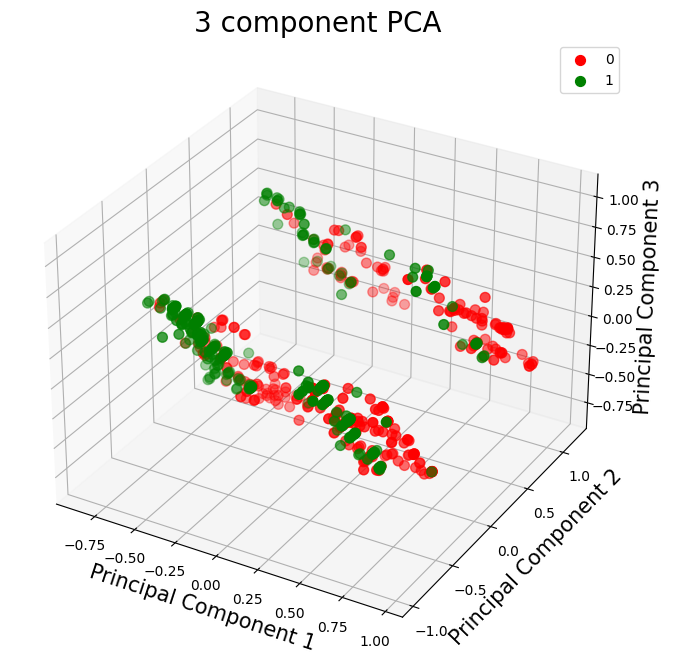

In [157]:
def VisualizePcaProjection(finalDf, targetColumn, tridimensional=False):
    fig = plt.figure(figsize = (8,8))
    
    if tridimensional:
        ax = fig.add_subplot(1,1,1, projection='3d')
        ax.set_zlabel('Principal Component 3', fontsize = 15)
        ax.set_title('3 component PCA', fontsize = 20)
    else:
        ax = fig.add_subplot(1,1,1)
        ax.set_title('2 component PCA', fontsize = 20)

    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)   
    
    targets = [ 0, 1 ]
    colors = ['r', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf[targetColumn] == target
        if tridimensional:
            ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                   finalDf.loc[indicesToKeep, 'principal component 2'],
                   finalDf.loc[indicesToKeep, 'principal component 3'],
                   c = color, s = 50)
        else:
            ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                    finalDf.loc[indicesToKeep, 'principal component 2'],
                    c = color, s = 50)
    ax.legend(targets)
    ax.grid()
    plt.show()

# PCA projection
pca = PCA()
# utilizando a normalização Z-Score    
# principalComponents = pca.fit_transform(x_zscore)
# utilizando a normalização Max-Min  
principalComponents = pca.fit_transform(x_minmax)
print("Explained variance per component:")
print(pca.explained_variance_ratio_.tolist())
print("\n\n")

principalDf = pd.DataFrame(data = principalComponents[:,0:2], 
                            columns = ['principal component 1', 
                                        'principal component 2'])
principalDf3d = pd.DataFrame(data = principalComponents[:,0:3], 
                            columns = ['principal component 1', 
                                        'principal component 2',
                                        'principal component 3'])
finalDf = pd.concat([principalDf, y_os], axis = 1)   
finalDf3d = pd.concat([principalDf3d, y_os], axis = 1)  
ShowInformationDataFrame(finalDf,"Dataframe PCA")

VisualizePcaProjection(finalDf, target)
VisualizePcaProjection(finalDf3d, target, tridimensional=True)

---
# Análise descritiva de dados
* Distribuição de frequência
* Visualização de dados (Histograma, Gráfico de setores, dispersão, etc)
* Medidas de resumo
  * Medidas de tendência central
  * Medidas de dispersão
  * Medidas de posição relativa
  * Medidas de associação

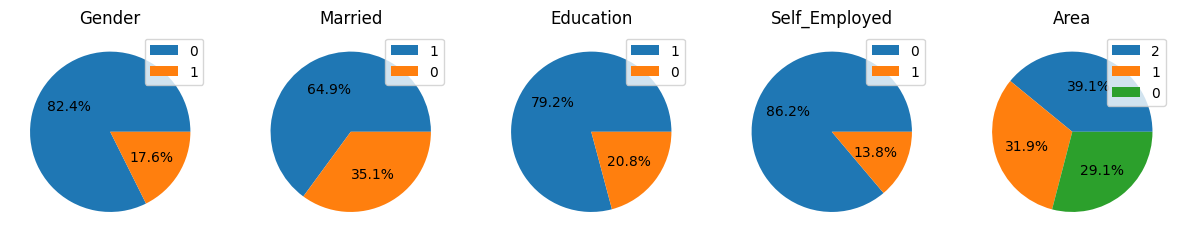

In [158]:
fig, ax = plt.subplots(1, 5, figsize=(15,10))
gender_pie = df['Gender'].value_counts().plot(ax=ax[0],kind='pie', legend=True, title='Gender', autopct='%1.1f%%', labeldistance=None, ylabel='')
married_pie = df['Married'].value_counts().plot(ax=ax[1],kind='pie', legend=True, title='Married', autopct='%1.1f%%', labeldistance=None, ylabel='')
educ_pie = df['Education'].value_counts().plot(ax=ax[2],kind='pie', legend=True, title='Education', autopct='%1.1f%%', labeldistance=None, ylabel='')
selfemp_pie = df['Self_Employed'].value_counts().plot(ax=ax[3],kind='pie', legend=True, title='Self_Employed', autopct='%1.1f%%', labeldistance=None, ylabel='')
area_pie = df['Area'].value_counts().plot(ax=ax[4],kind='pie', legend=True, title='Area', autopct='%1.1f%%', labeldistance=None, ylabel='')

plt.subplots_adjust(hspace = 0.5)

plt.show()

<AxesSubplot:title={'center':'Dependents'}>

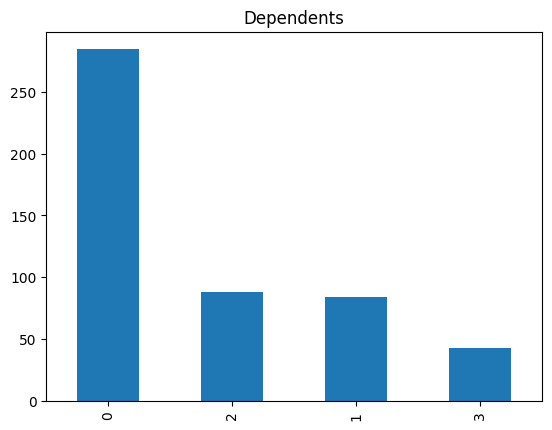

In [159]:
df['Dependents'].value_counts().plot(kind='bar', title='Dependents')

Média = 690312.41
Desvio Padrão = 590802.79
144200.0 8100000.0
0       (600000.0, 800000.0]
1       (400000.0, 600000.0]
2       (600000.0, 800000.0]
3       (200000.0, 400000.0]
4       (400000.0, 600000.0]
               ...          
609     (200000.0, 400000.0]
610     (400000.0, 600000.0]
611    (800000.0, 1000000.0]
612     (600000.0, 800000.0]
613     (400000.0, 600000.0]
Length: 499, dtype: category
Categories (8, interval[float64, right]): [(0.0, 200000.0] < (200000.0, 400000.0] < (400000.0, 600000.0] < (600000.0, 800000.0] < (800000.0, 1000000.0] < (1000000.0, 1200000.0] < (1200000.0, 1400000.0] < (1400000.0, 8100000.0]]


Text(0.5, 1.0, 'Total_Income')

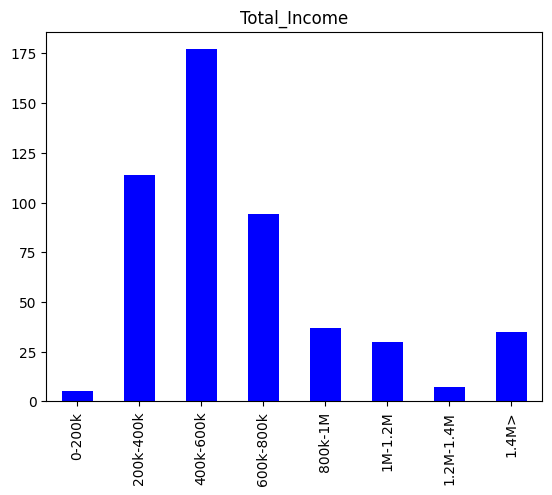

In [160]:
min = (df['Applicant_Income'] + df['Coapplicant_Income']).min()
max = (df['Applicant_Income'] + df['Coapplicant_Income']).max()
mean = (df['Applicant_Income'] + df['Coapplicant_Income']).mean()
std = (df['Applicant_Income'] + df['Coapplicant_Income']).std()
print(f'Média = {mean:.2f}\nDesvio Padrão = {std:.2f}')
print(min, max)
bins = []
for x in range(0, 1600000, 200000):
    bins.append(x)
bins.append(max)

print(pd.cut((df['Applicant_Income'] + df['Coapplicant_Income']), bins))
ax = pd.cut((df['Applicant_Income'] + df['Coapplicant_Income']), bins).value_counts(sort=False).plot.bar(color='blue')
ax.set_xticks(np.arange(8), ['0-200k', '200k-400k', '400k-600k', '600k-800k', '800k-1M', '1M-1.2M', '1.2M-1.4M', '1.4M>'])
ax.set_title('Total_Income')

Média = 13952505.01
Desvio Padrão = 8345237.00
0 60000000
0      (10000000, 12500000]
1      (12500000, 15000000]
2      (12500000, 15000000]
3        (5000000, 7500000]
4      (10000000, 12500000]
               ...         
609      (5000000, 7500000]
610      (2500000, 5000000]
611    (17500000, 60000000]
612    (17500000, 60000000]
613    (12500000, 15000000]
Name: Loan_Amount, Length: 499, dtype: category
Categories (8, interval[int64, right]): [(0, 2500000] < (2500000, 5000000] < (5000000, 7500000] < (7500000, 10000000] < (10000000, 12500000] < (12500000, 15000000] < (15000000, 17500000] < (17500000, 60000000]]


Text(0.5, 1.0, 'Loan_Amount')

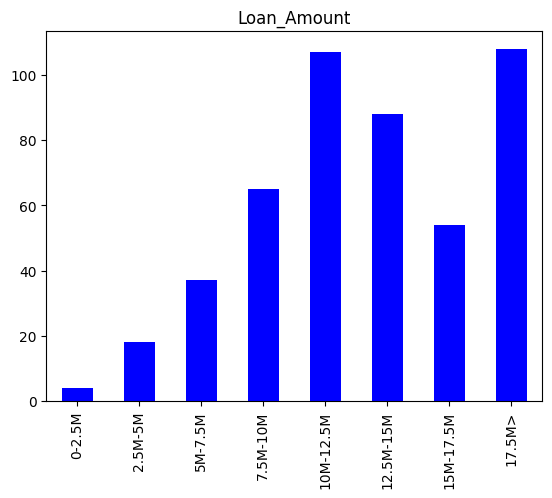

In [161]:
min = df['Loan_Amount'].min()
max = df['Loan_Amount'].max()
mean = df['Loan_Amount'].mean()
std = df['Loan_Amount'].std()
print(f'Média = {mean:.2f}\nDesvio Padrão = {std:.2f}')

print(min, max)
bins = []
# bins.append(0)
for x in range(0, 20000000, 2500000):
    bins.append(x)
bins.append(max)

print(pd.cut(df['Loan_Amount'], bins))
ax = pd.cut(df['Loan_Amount'], bins).value_counts(sort=False).plot.bar(color='blue')
ax.set_xticks(np.arange(8), ['0-2.5M', '2.5M-5M', '5M-7.5M', '7.5M-10M', '10M-12.5M', '12.5M-15M', '15M-17.5M', '17.5M>'])
ax.set_title('Loan_Amount')
# (df['Applicant_Income'] + df['Coapplicant_Income']).plot(kind='hist', title='Total_Income')

<AxesSubplot:title={'center':'Term'}>

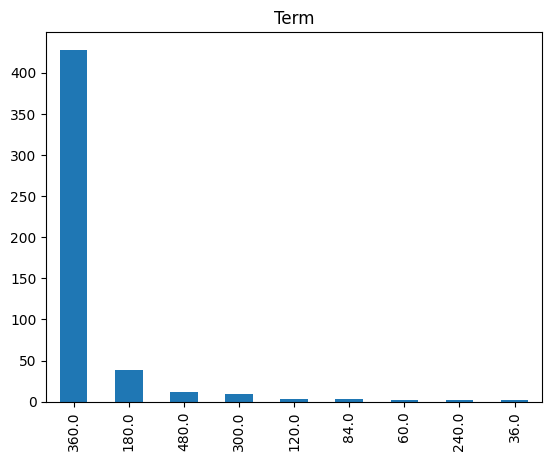

In [162]:
df['Term'].value_counts().plot(kind='bar', title='Term')

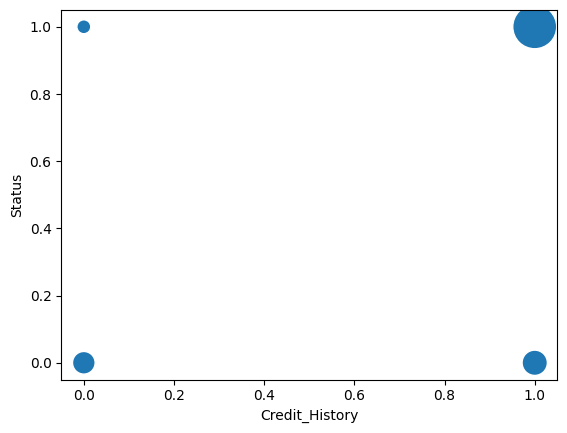

In [163]:
df_dispersao = df[['Credit_History','Status']]

df_dispersao = df_dispersao.groupby(['Credit_History', 'Status']).size().reset_index(name='tamanho')
fig = plt.figure()

ax = sns.scatterplot(data=df_dispersao, x='Credit_History', y='Status', size='tamanho', legend=False, sizes=(100,1000))
plt.show()


---
# Análise de grupos

In [164]:
def plot_samples(projected, labels, title):    
    fig = plt.figure()
    u_labels = np.unique(labels)
    for i in u_labels:
        plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,
                    edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.legend()
    plt.title(title)
    plt.show()

### K-means
* Variar número de grupos (parâmetro k)

##### K-means Sklearn

c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


585.9452685318215
For n_clusters = 2, silhouette score is 0.253162227665346)
For n_clusters = 2, homogeinity score is 0.04082060611997857)


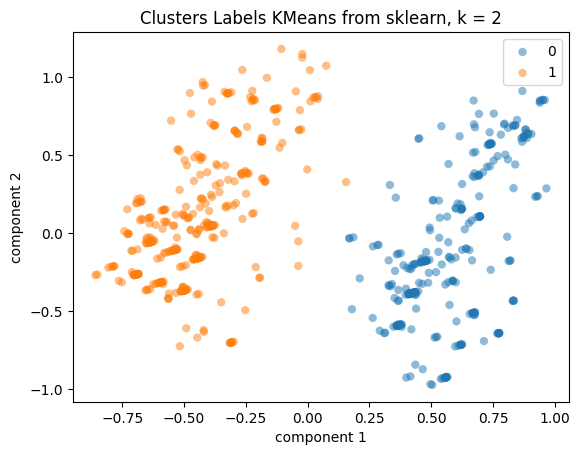

c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


498.6965378165247
For n_clusters = 3, silhouette score is 0.2637827557064986)
For n_clusters = 3, homogeinity score is 0.04834203377948818)


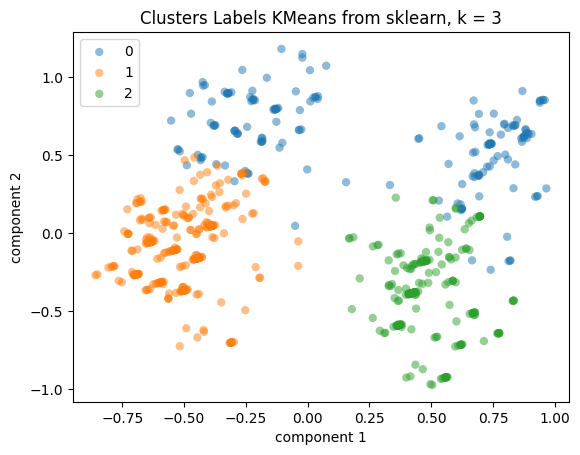

c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


447.6089755602583
For n_clusters = 4, silhouette score is 0.26461631127527857)
For n_clusters = 4, homogeinity score is 0.059320985680628775)


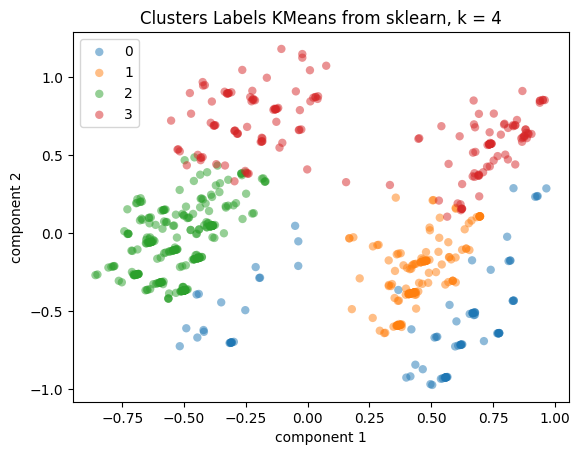

c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


401.1131729579608
For n_clusters = 5, silhouette score is 0.2950635591774315)
For n_clusters = 5, homogeinity score is 0.07497960399823611)


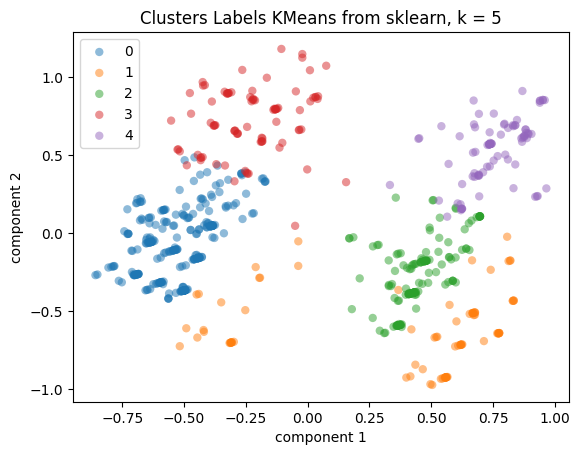

c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


364.0168349319141
For n_clusters = 6, silhouette score is 0.2773051596693049)
For n_clusters = 6, homogeinity score is 0.12216251798324328)


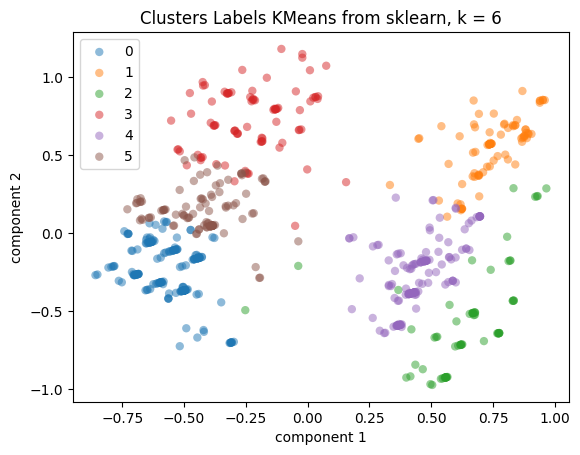

c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


336.41408250909063
For n_clusters = 7, silhouette score is 0.2785571430017821)
For n_clusters = 7, homogeinity score is 0.10205795189436398)


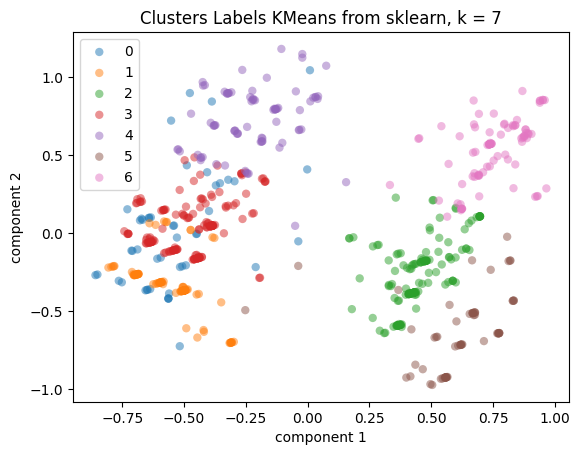

In [165]:
#Applying sklearn kmeans function
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k).fit(principalComponents)
    print(kmeans.inertia_)
    centers = kmeans.cluster_centers_
    score = silhouette_score(principalComponents, kmeans.labels_)    
    print("For n_clusters = {}, silhouette score is {})".format(k, score))
    homogeneity = homogeneity_score(y_os.to_numpy(), kmeans.labels_)
    print("For n_clusters = {}, homogeinity score is {})".format(k, homogeneity))

    #Visualize the results sklearn
    plot_samples(principalComponents, kmeans.labels_, f'Clusters Labels KMeans from sklearn, k = {k}')

#### K-means implementado

For n_clusters = 2, silhouette score is 0.20537236275381446)
For n_clusters = 2, homogeinity score is 0.00472799584359188)


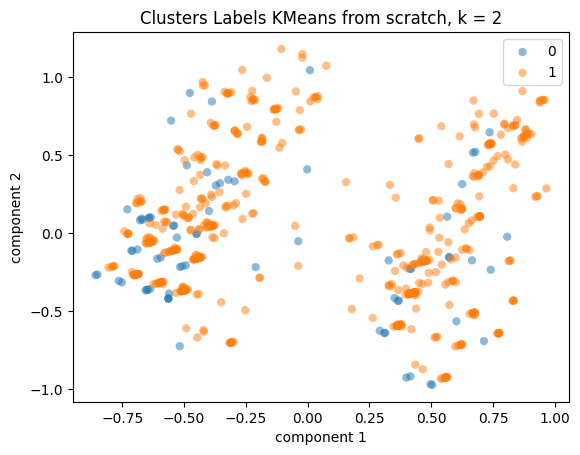

For n_clusters = 3, silhouette score is 0.21566647266815506)
For n_clusters = 3, homogeinity score is 0.07120525024857337)


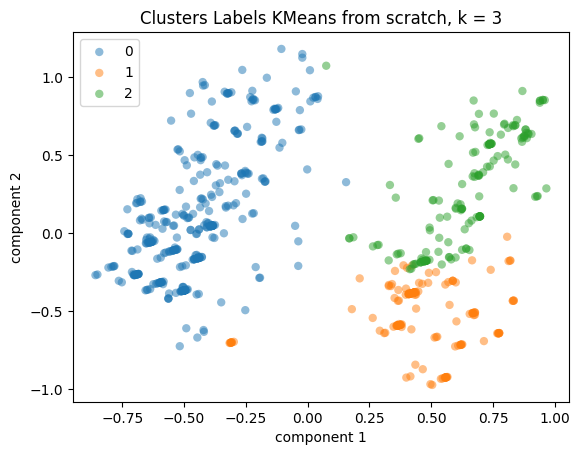

For n_clusters = 4, silhouette score is 0.26641150474370956)
For n_clusters = 4, homogeinity score is 0.05154397479882868)


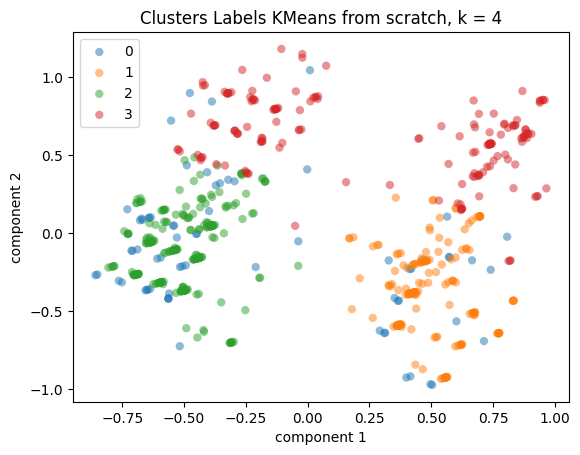

For n_clusters = 5, silhouette score is 0.18901440232272315)
For n_clusters = 5, homogeinity score is 0.26455664213349767)


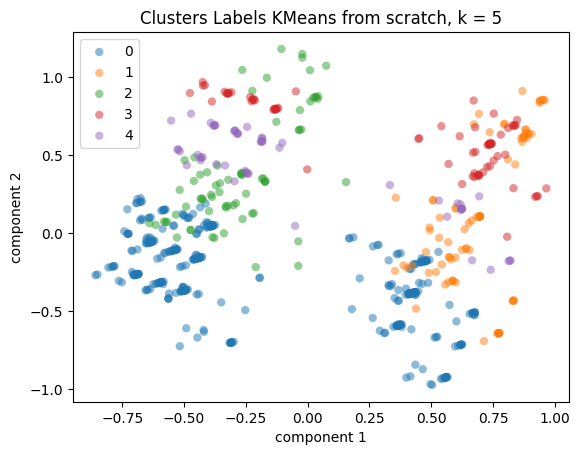

For n_clusters = 6, silhouette score is 0.2885105181839567)
For n_clusters = 6, homogeinity score is 0.21354742198284848)


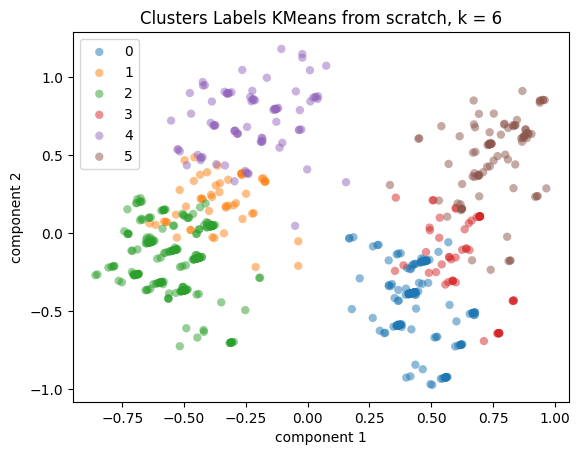

For n_clusters = 7, silhouette score is 0.27428485480480663)
For n_clusters = 7, homogeinity score is 0.1990794249131739)


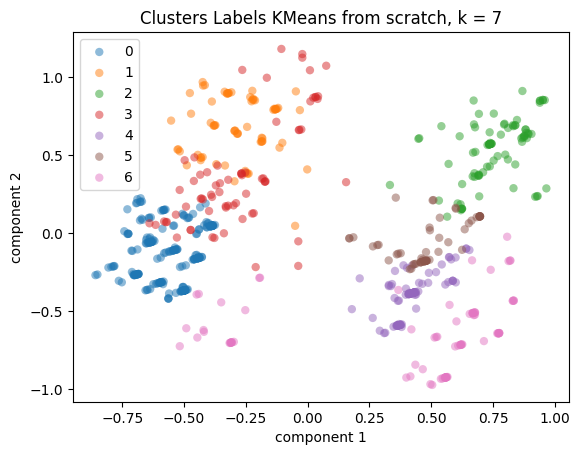

In [190]:
#Defining our kmeans function from scratch
def KMeans_scratch(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distance_type = ('euclidean', 'cityblock', 'minkowski', 'mahalanobis')
    dtype = 2
    distances = cdist(x, centroids ,distance_type[dtype]) #Step 2
    # Euclidean, Cityblock, Minkowski, Mahalanobis
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,distance_type[dtype])
        points = np.array([np.argmin(i) for i in distances])
         
    return points

for k in range(2, 8):
    #Applying our kmeans function from scratch
    labels = KMeans_scratch(principalComponents,k,25)

    score = silhouette_score(principalComponents, labels)    
    print("For n_clusters = {}, silhouette score is {})".format(k, score))
    homogeneity = homogeneity_score(y_os.to_numpy(), labels)
    print("For n_clusters = {}, homogeinity score is {})".format(k, homogeneity))

    #Visualize the results 
    plot_samples(principalComponents, labels, f'Clusters Labels KMeans from scratch, k = {k}')

### GMM

[0.4340176 0.5659824]
[[ 5.77176588e-01 -1.09573829e-01 -2.13561050e-02 -2.81921024e-02
  -2.26225662e-02  6.90125513e-02  5.01404039e-02  1.19775338e-03
   1.39940714e-03  1.82109150e-04 -7.48922012e-05]
 [-4.42601736e-01  8.40255273e-02  1.63767023e-02  2.16188143e-02
   1.73478746e-02 -5.29215420e-02 -3.84496361e-02 -9.18484455e-04
  -1.07312050e-03 -1.39648468e-04  5.74302890e-05]]
For k = 2
Silhouette score is 0.253162227665346
Homogeinity score is 0.04082060611997857


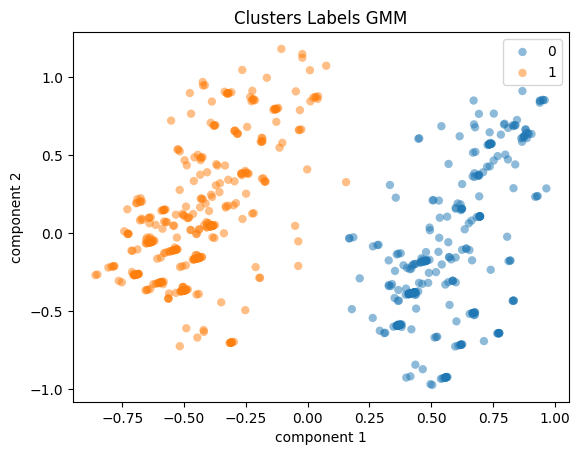

[0.40615836 0.4340176  0.15982405]
[[-5.19725630e-01 -6.75851941e-02 -1.21628272e-01  4.23058977e-02
  -3.90895661e-02  1.31367971e-02 -4.02634234e-02 -7.32033002e-03
  -3.14856227e-03 -2.34450234e-03  1.38831611e-03]
 [ 5.77176588e-01 -1.09573829e-01 -2.13561050e-02 -2.81921024e-02
  -2.26225662e-02  6.90125513e-02  5.01404039e-02  1.19775338e-03
   1.39940714e-03  1.82109150e-04 -7.48922012e-05]
 [-2.46607985e-01  4.69311489e-01  3.67086590e-01 -3.09529481e-02
   1.60771462e-01 -2.20794569e-01 -3.38402869e-02  1.53504258e-02
   4.20116730e-03  5.46351228e-03 -3.32472908e-03]]
For k = 3
Silhouette score is 0.22774736061627257
Homogeinity score is 0.046183501166875786


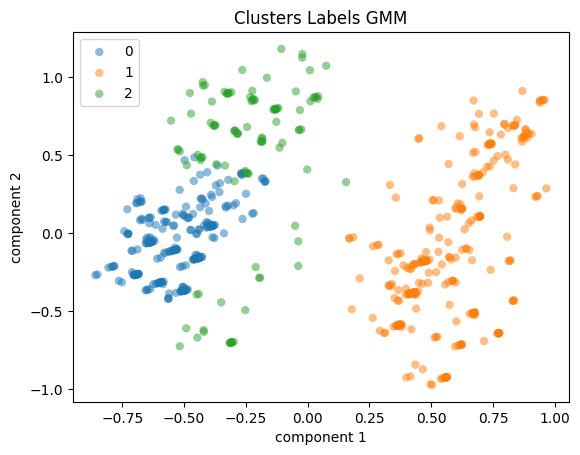

[0.35336844 0.26392962 0.29618723 0.08651471]
[[-5.36706371e-01 -1.71533559e-01 -1.64053645e-02 -7.95483131e-02
  -2.54075895e-02 -2.12458878e-02 -4.14373578e-02 -1.16867005e-02
  -6.06102572e-03 -8.92779884e-04 -2.73209210e-03]
 [ 2.80193478e-01  5.99187038e-01  3.46594108e-01 -8.39075100e-02
   4.20461368e-02 -2.08072432e-02 -7.11900712e-03  1.07909078e-02
  -3.20619979e-04 -6.17865910e-05  8.99732173e-05]
 [ 4.95590068e-01 -3.84879487e-01 -1.62560990e-01  3.44617898e-03
  -3.90655064e-02  6.68573001e-02  5.98045266e-02 -5.48944196e-03
   1.95172199e-03  4.79145183e-03 -4.13734782e-03]
 [-3.59288140e-01  1.90345971e-01 -4.33808570e-01  5.69091943e-01
   1.09249895e-01 -7.86340714e-02 -1.37752914e-02  3.36078503e-02
   1.90524957e-02 -1.25687207e-02  2.50491277e-02]]
For k = 4
Silhouette score is 0.23233814106679826
Homogeinity score is 0.17106271491270866


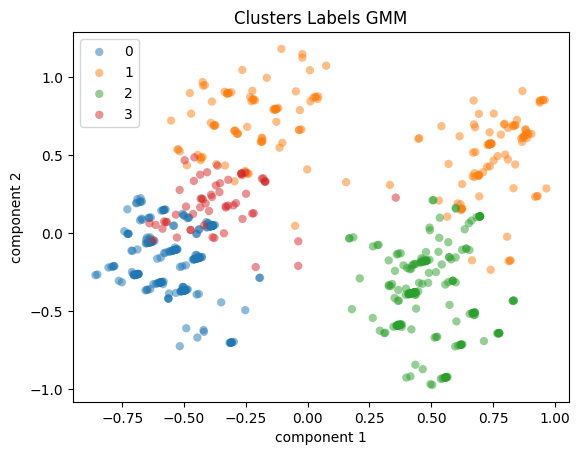

[0.29765396 0.18187024 0.07622981 0.30348352 0.14076246]
[[ 0.49490394 -0.38185932 -0.16589292  0.00609854 -0.03839199  0.06799192
   0.06349327 -0.00307334  0.00248415  0.00249814 -0.00154598]
 [-0.28619761  0.55656487  0.14771159  0.13336411  0.05694609 -0.07971981
  -0.03451631 -0.03177725  0.00353309  0.00540698 -0.00650871]
 [-0.522628   -0.03382723 -0.23458188  0.13913313  0.42514975  0.27137153
  -0.15426129  0.12911682 -0.00722336 -0.00840246  0.03709133]
 [-0.52314041 -0.17212416 -0.00930502 -0.07548731 -0.11934205 -0.1098292
  -0.00804484 -0.01670516 -0.00192511 -0.0017676  -0.00539293]
 [ 0.73418041  0.4777896   0.30704489 -0.09780417  0.03466827  0.04905675
   0.01121925  0.01364937 -0.0017555  -0.00390723  0.00321894]]
For k = 5
Silhouette score is 0.24487106508852677
Homogeinity score is 0.11817002412581662


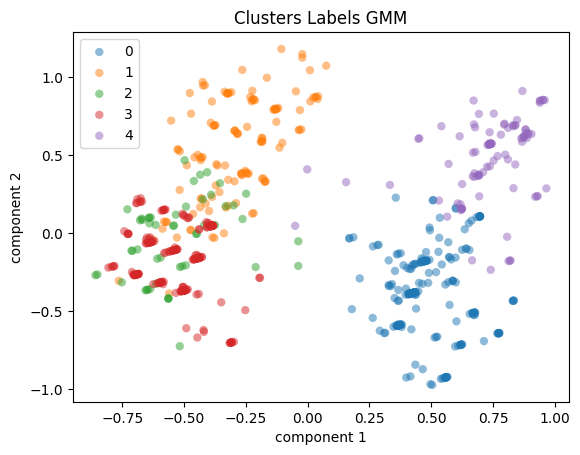

[0.14222855 0.11257508 0.18931087 0.12153887 0.22466906 0.20967757]
[[-4.31324162e-01 -2.22141446e-01 -1.33545970e-02 -1.13638225e-01
  -1.53789877e-01 -1.96490879e-01 -2.66397806e-01  5.63772876e-03
  -2.84796067e-02 -4.69439475e-03  3.98287615e-03]
 [ 7.18014682e-01  1.30147571e-01 -1.74885073e-01  5.63963281e-01
  -1.45365454e-02  3.27700754e-02  3.67453827e-03 -1.28315869e-02
  -8.90304792e-03 -4.54665039e-03 -6.72621736e-03]
 [ 2.18544700e-01  5.33841130e-01  4.02961489e-01 -3.00166787e-01
   5.13068354e-02  9.61209811e-04  3.62399205e-02  1.01611973e-02
   1.79270817e-03 -5.64483038e-03  1.97277714e-03]
 [-2.81008633e-01  3.74171567e-01 -2.12708093e-01  5.45247658e-01
   9.21717885e-02 -1.24691637e-01 -8.64057744e-02  2.73253175e-02
   1.60704165e-02 -8.17737637e-04  1.26067245e-02]
 [ 4.48251674e-01 -4.49763028e-01 -1.09333238e-01 -1.98751181e-01
  -4.73850120e-02  8.39951611e-02  7.96773099e-02  3.16483168e-03
   4.00887264e-03  7.34201436e-03  3.87853383e-04]
 [-6.07655115e-01

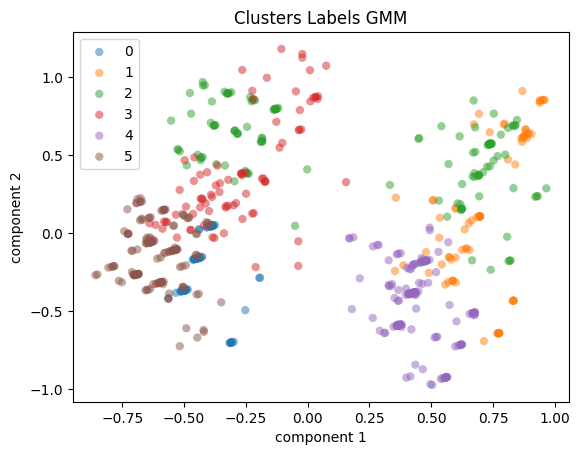

[0.09824047 0.40615836 0.03225806 0.11876833 0.12756598 0.09970688
 0.11730192]
[[ 6.57287091e-01 -5.60334186e-01  1.68116694e-01 -2.90326632e-02
   4.33862757e-01 -3.62511053e-01  1.53455895e-01 -7.52426191e-03
  -9.04541116e-05 -1.51580122e-03  1.63083387e-03]
 [-5.19725630e-01 -6.75851941e-02 -1.21628272e-01  4.23058977e-02
  -3.90895661e-02  1.31367971e-02 -4.02634234e-02 -7.32033002e-03
  -3.14856227e-03 -2.34450234e-03  1.38831611e-03]
 [-3.15287524e-01 -5.27960309e-01  2.26379735e-01  9.75733516e-02
   5.02412712e-01 -6.22543161e-01 -2.06702263e-02  3.22389093e-02
   1.93445632e-02  6.97396360e-03 -3.95116024e-03]
 [ 7.44807386e-01  5.46698864e-01  2.50701067e-01 -7.64216682e-02
  -7.93366512e-02  1.32471166e-01  2.15974073e-03  2.46315101e-03
   2.09849933e-03 -2.91846235e-03  1.45979148e-03]
 [-2.29240745e-01  7.21495162e-01  4.02667634e-01 -6.34538514e-02
   7.43794224e-02 -1.19202971e-01 -3.71706470e-02  1.10797749e-02
   3.71802812e-04  5.08155907e-03 -3.16632120e-03]
 [ 4.

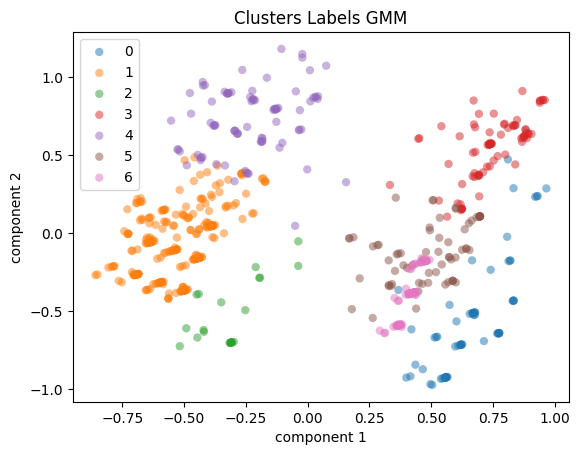

In [186]:
for k in range(2, 8):
    #Applying sklearn GMM function
    gm  = GaussianMixture(n_components=k).fit(principalComponents)
    print(gm.weights_)
    print(gm.means_)
    gm_predicts = gm.predict(principalComponents)
    silhouette_gm_score = silhouette_score(principalComponents, gm_predicts)
    homogeneity_gm_score = homogeneity_score(y_os.to_numpy(), gm_predicts)
    print("For k =", k)
    print("Silhouette score is {}".format(silhouette_gm_score))
    homogeneity = homogeneity_score(y_os.to_numpy(), kmeans.labels_)
    print("Homogeinity score is {}".format(homogeneity_gm_score))
    #Visualize the results sklearn
    plot_samples(principalComponents, gm_predicts, 'Clusters Labels GMM')

---
# Classificação
* Divisão da base:
  * Holdout (Treinamento 70% e Teste 30%)
  * Cross-Validation (k=10)
* Métricas:
  * Matrix de confusão
  * Acurácia
  * F1 Score

In [168]:
x_use = x_zscore # ou x_minmax ou x_zscore ou principalComponents
y_use = y_os

# Separação de conjunto de treinamento (70%) e teste (30%)
x_train, x_test, y_train, y_test = train_test_split(x_use, y_use, test_size=0.3, random_state=0)
print(x_train.shape)
print(x_test.shape)

acuracia_holdout = dict()
f1_holdout = dict()
acuracia_crossval = dict()
f1_crossval = dict()

(477, 11)
(205, 11)


### Árvore de Decisão (Decision Tree)

* Holdout

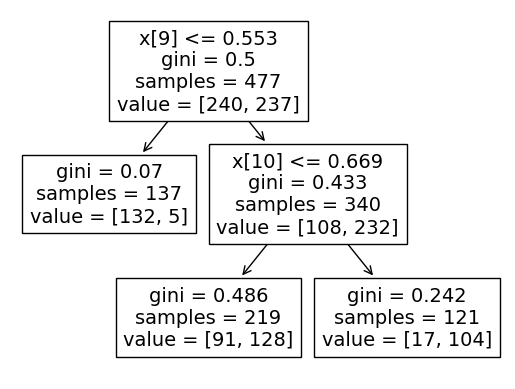

accuracy_score = 78.54%
f1_score = 82.26%


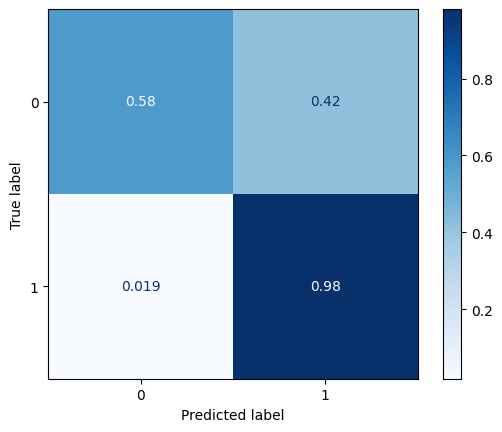

In [169]:
# Construindo a Árvore de decisão
clf = DecisionTreeClassifier(max_leaf_nodes=3)
clf.fit(x_train, y_train)
tree.plot_tree(clf)
plt.show()

predictions = clf.predict(x_test)
# print(predictions)

# Métricas
accuracy = accuracy_score(y_test, predictions)
f1_score = f1_score(y_test, predictions)
confusion_matrix = confusion_matrix(y_test, predictions, normalize='true')
print('accuracy_score = {:.2f}%'.format(accuracy*100) )
print('f1_score = {:.2f}%'.format(f1_score*100) )
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix).plot(cmap='Blues')
plt.show()

acuracia_holdout['DecisionTree'] = accuracy
f1_holdout['DecisionTree'] = f1_score

* Cross-Validation

accuracy_score = 77.00%
f1_score = 81.31%


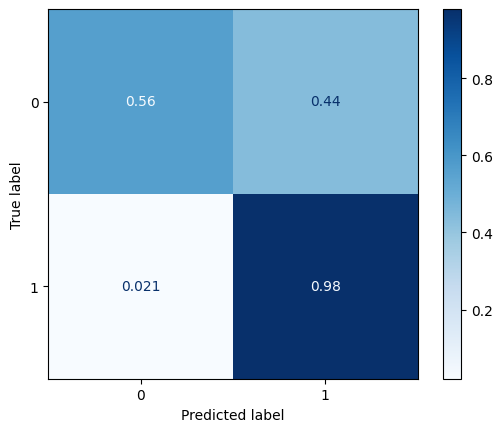

In [170]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Validação-cruzada
clf = DecisionTreeClassifier(max_leaf_nodes=3)
result = cross_validate(estimator=clf,
                        X= x_use,
                        y= y_use,
                        cv = 10,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        return_estimator=True)

# Predições da validação-cruzada
predictions = cross_val_predict(estimator=clf,
                        X= x_use,
                        y= y_use,
                        cv = 10)
# print(predictions)

# Métricas
accuracy = result['test_accuracy'].mean()
f1_score = result['test_f1'].mean()
confusion_matrix = confusion_matrix(y_use, predictions, normalize='true')
print('accuracy_score = {:.2f}%'.format(accuracy*100) )
print('f1_score = {:.2f}%'.format(f1_score*100) )
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix).plot(cmap='Blues')
plt.show()

acuracia_crossval['DecisionTree'] = accuracy
f1_crossval['DecisionTree'] = f1_score

### KNN (K-Mearest Neighbors)
* Encontrar o parâmetro k com melhor resultado

* Holdout

Best K: 14
Best Accuracy: 0.8048780487804879
Acurracy K-NN: 80.49%
F1 Score K-NN: 81.65%


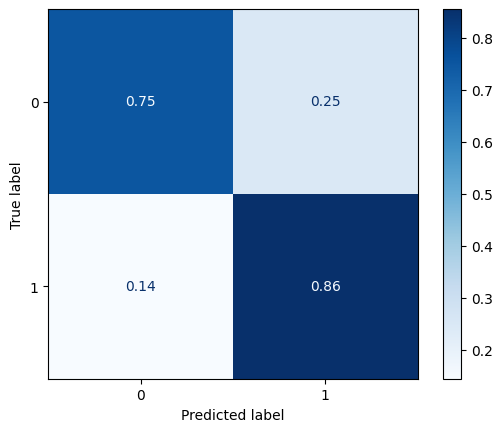

In [171]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_k = 0
best_accuracy = 0
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_hat_test = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_hat_test)
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

print(f'Best K: {best_k}\nBest Accuracy: {best_accuracy}')

# TESTS USING knn classifier from sk-learn
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)
y_hat_test = knn.predict(x_test)

# Get test accuracy and F1 score
accuracy = accuracy_score(y_test, y_hat_test)
f1_score = f1_score(y_test, y_hat_test)
print("Acurracy K-NN: {:.2f}%".format(accuracy * 100))
print("F1 Score K-NN: {:.2f}%".format(f1_score * 100))

# Get test confusion matrix 
confusion_matrix = confusion_matrix(y_test, y_hat_test, normalize='true')
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix).plot(cmap='Blues')
plt.show()

acuracia_holdout['KNN'] = accuracy
f1_holdout['KNN'] = f1_score

* Cross-Validation

Best K: 18
Best Accuracy: 0.7802429667519182
accuracy_score = 78.02%
f1_score = 80.18%


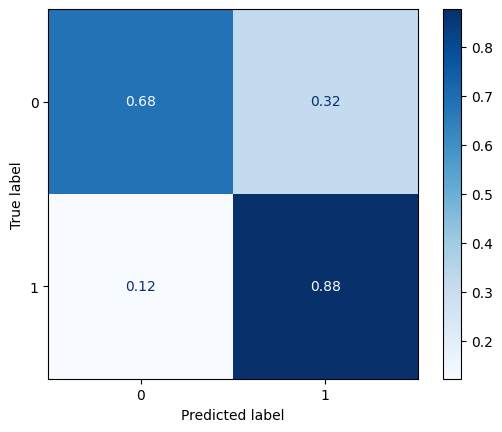

In [172]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


best_k = 0
best_accuracy = 0
for k in range(1, 50):
    clf = KNeighborsClassifier(n_neighbors=k)
    result = cross_validate(estimator=clf,
                        X= x_use,
                        y= y_use,
                        cv = 10,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        return_estimator=True)
    accuracy = result['test_accuracy'].mean()
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

print(f'Best K: {best_k}\nBest Accuracy: {best_accuracy}')

# Validação-cruzada
clf = KNeighborsClassifier(n_neighbors=best_k)
result = cross_validate(estimator=clf,
                        X= x_use,
                        y= y_use,
                        cv = 10,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        return_estimator=True)

# Predições da validação-cruzada
predictions = cross_val_predict(estimator=clf,
                        X= x_use,
                        y= y_use,
                        cv = 10)
#print(predictions)

# Métricas
accuracy = result['test_accuracy'].mean()
f1_score = result['test_f1'].mean()
confusion_matrix = confusion_matrix(y_use, predictions, normalize='true')
print('accuracy_score = {:.2f}%'.format(accuracy*100) )
print('f1_score = {:.2f}%'.format(f1_score*100) )
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix).plot(cmap='Blues')
plt.show()

acuracia_crossval['KNN'] = accuracy
f1_crossval['KNN'] = f1_score

### SVM (Support Vectors Machine)

* Holdout

Qtd Support vectors: 
[121 122]
Acurracy SVM from sk-learn: 78.54%
F1 Score SVM from sk-learn: 80.18%


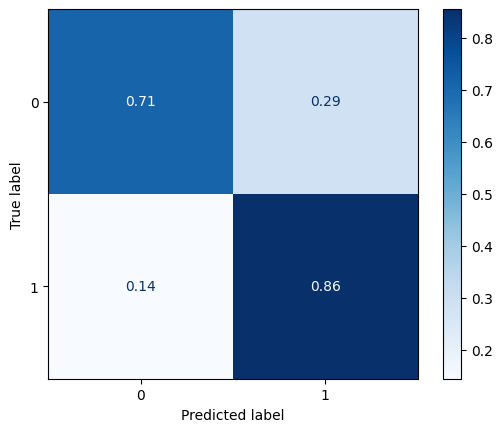

In [173]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

 # TESTS USING SVM classifier from sk-learn    
svm = SVC(kernel='linear') # poly, rbf, linear
# training using train dataset
svm.fit(x_train, y_train)
# get support vectors
# print(svm.support_vectors_)
# get indices of support vectors
# print(svm.support_)
# get number of support vectors for each class
print("Qtd Support vectors: ")
print(svm.n_support_)
# predict using test dataset
y_hat_test = svm.predict(x_test)

# Get test accuracy score
accuracy = accuracy_score(y_test, y_hat_test)
f1_score = f1_score(y_test, y_hat_test)
print("Acurracy SVM from sk-learn: {:.2f}%".format(accuracy*100))
print("F1 Score SVM from sk-learn: {:.2f}%".format(f1_score*100))

# Get test confusion matrix 
confusion_matrix = confusion_matrix(y_test, y_hat_test, normalize='true')
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix).plot(cmap='Blues')
plt.show()

acuracia_holdout['SVM'] = accuracy
f1_holdout['SVM'] = f1_score

* Cross-Validation

accuracy_score = 78.47%
f1_score = 80.54%


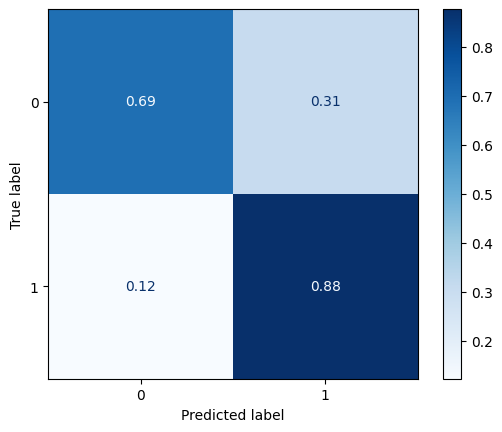

In [174]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Validação-cruzada
clf = SVC(kernel='linear') # poly, rbf, linear
result = cross_validate(estimator=clf,
                        X= x_use,
                        y= y_use,
                        cv = 10,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        return_estimator=True)

# Predições da validação-cruzada
predictions = cross_val_predict(estimator=clf,
                        X= x_use,
                        y= y_use,
                        cv = 10)
# print(predictions)

# Métricas
accuracy = result['test_accuracy'].mean()
f1_score = result['test_f1'].mean()
confusion_matrix = confusion_matrix(y_use, predictions, normalize='true')
print('accuracy_score = {:.2f}%'.format(accuracy*100) )
print('f1_score = {:.2f}%'.format(f1_score*100) )
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix).plot(cmap='Blues')
plt.show()

acuracia_crossval['SVM'] = accuracy
f1_crossval['SVM'] = f1_score

### Rede Neural MLP (Multilayer Perceptron)
* Arquitetura da rede:
  * Número de neurônios
  * Camadas escondidas
  * Tipo de função de ativação

* Holdout

Acurracy MLP from sk-learn: 76.59%
F1 Score MLP from sk-learn: 77.98%


c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


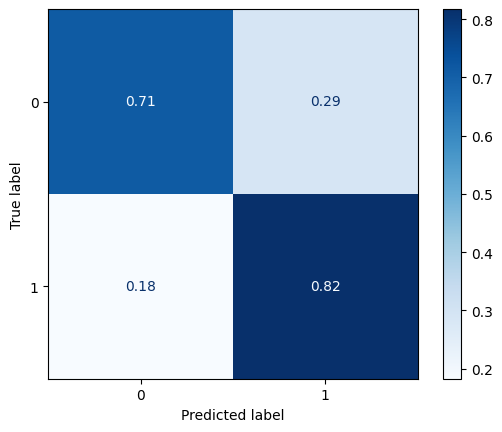

In [175]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

mlp = MLPClassifier(hidden_layer_sizes=(10,10),
                    activation='relu',
                    max_iter=1500)
mlp.fit(x_train, y_train)
predictions = mlp.predict(x_test)
# print(predictions)

# Get test accuracy score
accuracy = accuracy_score(y_test, predictions)
f1_score = f1_score(y_test, predictions)
print("Acurracy MLP from sk-learn: {:.2f}%".format(accuracy*100))
print("F1 Score MLP from sk-learn: {:.2f}%".format(f1_score*100))

# Get test confusion matrix 
confusion_matrix = confusion_matrix(y_test, predictions, normalize='true')
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix).plot(cmap='Blues')
plt.show()

acuracia_holdout['MLP'] = accuracy
f1_holdout['MLP'] = f1_score

* Cross-Validation

Acurracy MLP from sk-learn: 80.23%
F1 Score MLP from sk-learn: 81.74%


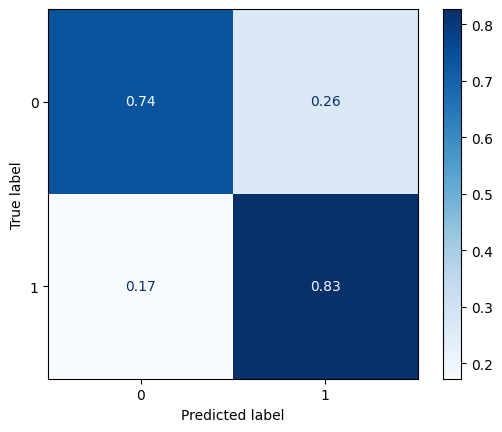

In [176]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

clf = MLPClassifier(hidden_layer_sizes=(10,10),
                    activation='relu',
                    max_iter=1500)
result = cross_validate(estimator=clf,
                        X= x_use,
                        y= y_use,
                        cv = 10,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        return_estimator=True)

# Predições da validação-cruzada
predictions = cross_val_predict(estimator=clf,
                        X= x_use,
                        y= y_use,
                        cv = 10)
# print(predictions)
# Get test accuracy score
accuracy = result['test_accuracy'].mean()
f1_score = result['test_f1'].mean()
print("Acurracy MLP from sk-learn: {:.2f}%".format(accuracy*100))
print("F1 Score MLP from sk-learn: {:.2f}%".format(f1_score*100))

# Get test confusion matrix 
confusion_matrix = confusion_matrix(y_use, predictions, normalize='true')
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix).plot(cmap='Blues')
plt.show()

acuracia_crossval['MLP'] = accuracy
f1_crossval['MLP'] = f1_score

### Comparação final dos classificadores

In [177]:
tree_metrics_holdout = pd.Series({'Classificador': 'DecisionTree', 'accuracy': acuracia_holdout['DecisionTree'], 'f1_score': f1_holdout['DecisionTree']})
knn_metrics_holdout = pd.Series({'Classificador': 'KNN', 'accuracy': acuracia_holdout['KNN'], 'f1_score': f1_holdout['KNN']})
svm_metrics_holdout = pd.Series({'Classificador': 'SVM', 'accuracy': acuracia_holdout['SVM'], 'f1_score': f1_holdout['SVM']})
mlp_metrics_holdout = pd.Series({'Classificador': 'MLP', 'accuracy': acuracia_holdout['MLP'], 'f1_score': f1_holdout['MLP']})

tree_metrics_cross_val = pd.Series({'Classificador': 'DecisionTree', 'accuracy': acuracia_crossval['DecisionTree'], 'f1_score': f1_crossval['DecisionTree']})
knn_metrics_cross_val = pd.Series({'Classificador': 'KNN', 'accuracy': acuracia_crossval['KNN'], 'f1_score': f1_crossval['KNN']})
svm_metrics_cross_val = pd.Series({'Classificador': 'SVM', 'accuracy': acuracia_crossval['SVM'], 'f1_score': f1_crossval['SVM']})
mlp_metrics_cross_val = pd.Series({'Classificador': 'MLP', 'accuracy': acuracia_crossval['MLP'], 'f1_score': f1_crossval['MLP']})

df_metrics_holdout = pd.DataFrame([tree_metrics_holdout, knn_metrics_holdout, svm_metrics_holdout, mlp_metrics_holdout])
df_metrics_cross_val = pd.DataFrame([tree_metrics_cross_val, knn_metrics_cross_val, svm_metrics_cross_val, mlp_metrics_cross_val])

print('\nHOLDOUT\n', df_metrics_holdout.head())
print('\nCROSS-VALIDATION\n', df_metrics_cross_val.head())


HOLDOUT
   Classificador  accuracy  f1_score
0  DecisionTree  0.785366  0.822581
1           KNN  0.804878  0.816514
2           SVM  0.785366  0.801802
3           MLP  0.765854  0.779817

CROSS-VALIDATION
   Classificador  accuracy  f1_score
0  DecisionTree  0.770034  0.813111
1           KNN  0.780243  0.801758
2           SVM  0.784655  0.805379
3           MLP  0.802259  0.817384
